In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
dist = pd.read_csv('datos/dist_puntos.csv', sep=';')
precios_estudio = pd.read_csv('datos/precios_estudio.csv', sep=';')
precios_medios_zona = pd.read_csv('datos/precios_medios_zona.csv', sep=';')
ventas_estudio = pd.read_csv('datos/ventas_estudio.csv', sep=';')
ventas_medias_zona = pd.read_csv('datos/ventas_medias_zona.csv', sep=';')

ventas_estudio.head(30)


,cod_producto,fecha,ventas,cod_punto_venta
0,A,2020-09-15,"0,260842335906573",cod_pv_5803
1,A,2020-10-03,"0,270867240045403",cod_pv_5803
2,A,2022-01-07,"0,2570784790969",cod_pv_2574
3,A,2022-07-06,"0,166767939733113",cod_pv_5803
4,A,2019-05-02,"0,425797525398269",cod_pv_2574
5,A,2021-06-09,"0,292575630086007",cod_pv_2574
6,A,2022-05-31,"0,114683841675185",cod_pv_5803
7,A,2019-12-07,"0,27203959814546",cod_pv_5803
8,A,2020-06-21,"0,289482095561868",cod_pv_5803
9,A,2019-04-10,"0,388038107285449",cod_pv_2574


In [2]:
# Filtrar por cod_punto_ventas
ventas_estudio_filtrado = ventas_estudio[ventas_estudio['cod_punto_venta'].isin(['cod_pv_2574', 'cod_pv_5803'])]

# Convertir la columna de fechas a datetime
ventas_estudio_filtrado['fecha'] = pd.to_datetime(ventas_estudio_filtrado['fecha'])

# Convertir la columna de ventas a float
ventas_estudio_filtrado['ventas'] = ventas_estudio_filtrado['ventas'].str.replace(',', '.').astype(float)

# Filtrar por el rango de fechas
ventas_estudio_filtrado = ventas_estudio_filtrado[(ventas_estudio_filtrado['fecha'].dt.month == 2) & (ventas_estudio_filtrado['fecha'].dt.day >= 21) |
                          (ventas_estudio_filtrado['fecha'].dt.month == 3) & (ventas_estudio_filtrado['fecha'].dt.day <= 20)]


# Eliminar columnas innecesarias
ventas_estudio_filtrado = ventas_estudio_filtrado.drop(columns=['cod_producto'])
# Mostrar el DataFrame filtrado
ventas_estudio_filtrado.head()

,fecha,ventas,cod_punto_venta
17,2020-03-14,0.346538,cod_pv_2574
21,2022-03-03,0.258954,cod_pv_2574
24,2020-02-28,0.357437,cod_pv_2574
48,2021-03-08,0.300592,cod_pv_2574
54,2019-03-17,0.350135,cod_pv_2574


In [3]:
# calcular la media de ventas por cada año
ventas_estudio_filtrado_media = ventas_estudio_filtrado.copy()
ventas_estudio_filtrado_media['año'] = ventas_estudio_filtrado_media['fecha'].dt.year.astype(str)
ventas_estudio_filtrado_media = ventas_estudio_filtrado_media.groupby(['año', 'cod_punto_venta']).mean()
ventas_estudio_filtrado_media = ventas_estudio_filtrado_media.reset_index()
ventas_estudio_filtrado_media.head(20)

,año,cod_punto_venta,fecha,ventas
0,2019,cod_pv_2574,2019-03-07 00:00:00,0.259366
1,2019,cod_pv_5803,2019-03-07 00:00:00,0.235686
2,2020,cod_pv_2574,2020-03-06 00:00:00,0.334816
3,2020,cod_pv_5803,2020-03-06 00:00:00,0.319134
4,2021,cod_pv_2574,2021-03-06 12:00:00,0.292601
5,2021,cod_pv_5803,2021-03-06 12:00:00,0.269925
6,2022,cod_pv_2574,2022-03-06 12:00:00,0.268864
7,2022,cod_pv_5803,2022-03-06 12:00:00,0.227182


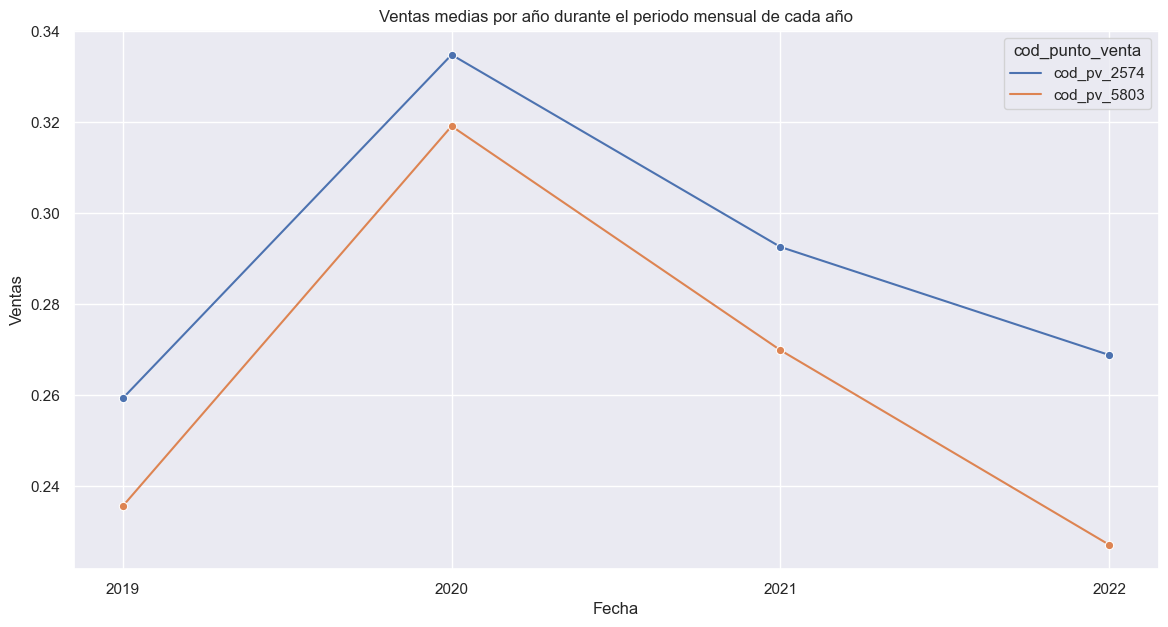

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Configurar el estilo de los gráficos
sns.set(style="darkgrid")

# Crear el gráfico de líneas
plt.figure(figsize=(14, 7))
sns.lineplot(data=ventas_estudio_filtrado_media, x='año', y='ventas', marker='o', hue='cod_punto_venta')

# Configurar etiquetas y título
plt.title('Ventas medias por año durante el periodo mensual de cada año')
plt.xlabel('Fecha')
plt.ylabel('Ventas')

# Mostrar el gráfico
plt.show()

La acción de precios no ha tenido un impacto positivo en cuanto a unidades vendidas ya que al comparar el periodo de tiempo donde se ha despleago dicha acción de los años para los que se dispone datos, observamos que en 2022 se obtienen los peores valores de unidades vendidas

Como se indica que las ventas tienen un caracter temporal marcado vamos a comparar únicamente periodos de tiempo iguales, es decir, el mes que dura la promición comparado en distintos años

In [5]:
ventas_estudio_filtrado.head(20)

,fecha,ventas,cod_punto_venta
17,2020-03-14,0.346538,cod_pv_2574
21,2022-03-03,0.258954,cod_pv_2574
24,2020-02-28,0.357437,cod_pv_2574
48,2021-03-08,0.300592,cod_pv_2574
54,2019-03-17,0.350135,cod_pv_2574
66,2022-02-23,0.251473,cod_pv_5803
67,2021-03-04,0.222529,cod_pv_5803
81,2022-03-18,0.245768,cod_pv_5803
119,2019-03-02,0.255969,cod_pv_2574
121,2022-03-07,0.291067,cod_pv_5803


Dado que en 2019 no hay registro del día 21 de febrero se decide eliminar este día en todos los años para que las comparaciones entre años sean justas. 
El 2020 es bisiesto, se elimina el día 29 pues se consiedera outlier

In [6]:
# Eliminar el 21 de febrero de todos los años y el 29 de febrero de los años bisiestos 
ventas_estudio_filtrado_sin_outliers = ventas_estudio_filtrado[~((ventas_estudio_filtrado['fecha'].dt.month == 2) & (ventas_estudio_filtrado['fecha'].dt.day == 21))]
ventas_estudio_filtrado_sin_outliers = ventas_estudio_filtrado_sin_outliers[~((ventas_estudio_filtrado_sin_outliers['fecha'].dt.month == 2) & (ventas_estudio_filtrado_sin_outliers['fecha'].dt.day == 29))]

C:\Users\laura\AppData\Local\Temp\ipykernel_3708\1729456257.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventas_estudio_filtrado_2574.sort_values(by='fecha', inplace=True)
C:\Users\laura\AppData\Local\Temp\ipykernel_3708\1729456257.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventas_estudio_filtrado_2574['mes_dia'] = ventas_estudio_filtrado_2574['fecha'].dt.strftime('%m-%d')
C:\Users\laura\AppData\Local\Temp\ipykernel_3708\1729456257.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

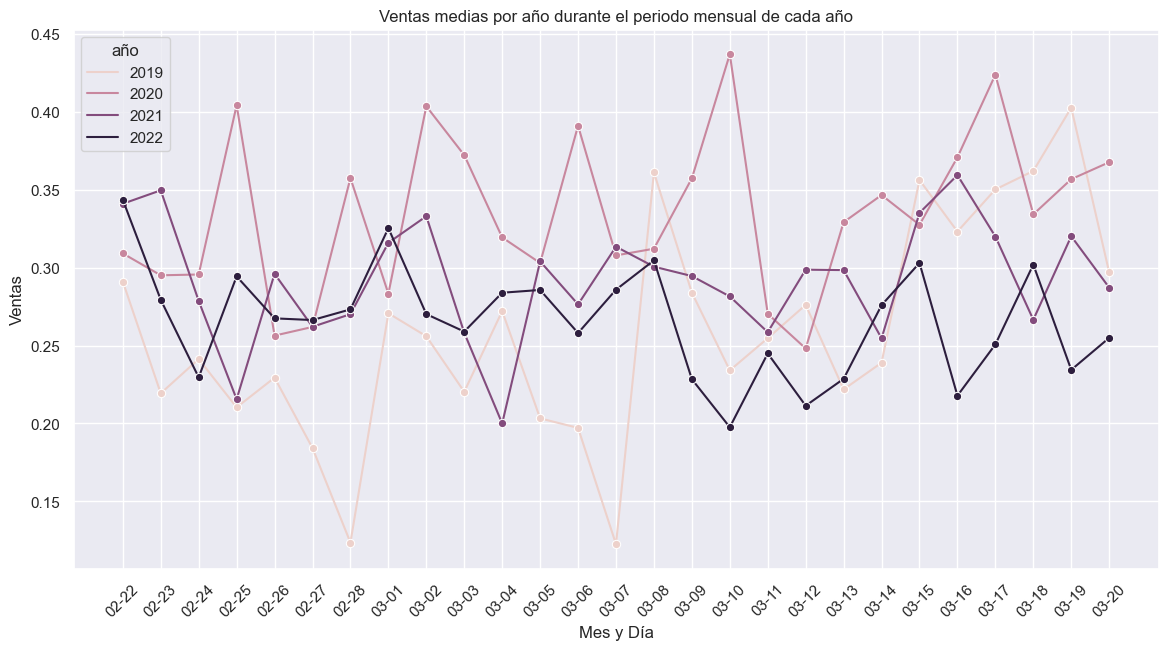

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar por cod_punto_ventas a cod_pv_2574 
ventas_estudio_filtrado_2574 = ventas_estudio_filtrado_sin_outliers[ventas_estudio_filtrado_sin_outliers['cod_punto_venta']=='cod_pv_2574']

# Crear nuevas columnas para mes_dia y año
ventas_estudio_filtrado_2574.sort_values(by='fecha', inplace=True)
ventas_estudio_filtrado_2574['mes_dia'] = ventas_estudio_filtrado_2574['fecha'].dt.strftime('%m-%d')
ventas_estudio_filtrado_2574['año'] = ventas_estudio_filtrado_2574['fecha'].dt.year

# Configurar el estilo de los gráficos
sns.set(style="darkgrid")

# Crear el gráfico de líneas
plt.figure(figsize=(14, 7))
sns.lineplot(data=ventas_estudio_filtrado_2574, x='mes_dia', y='ventas', marker='o', hue='año')

# Configurar etiquetas y título
plt.title('Ventas medias por año durante el periodo mensual de cada año')
plt.xlabel('Mes y Día')
plt.ylabel('Ventas')
plt.xticks(rotation=45)


# Mostrar el gráfico
plt.show()

C:\Users\laura\AppData\Local\Temp\ipykernel_3708\2921296109.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventas_estudio_filtrado_5803.sort_values(by='fecha', inplace=True)
C:\Users\laura\AppData\Local\Temp\ipykernel_3708\2921296109.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventas_estudio_filtrado_5803['mes_dia'] = ventas_estudio_filtrado_5803['fecha'].dt.strftime('%m-%d')
C:\Users\laura\AppData\Local\Temp\ipykernel_3708\2921296109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

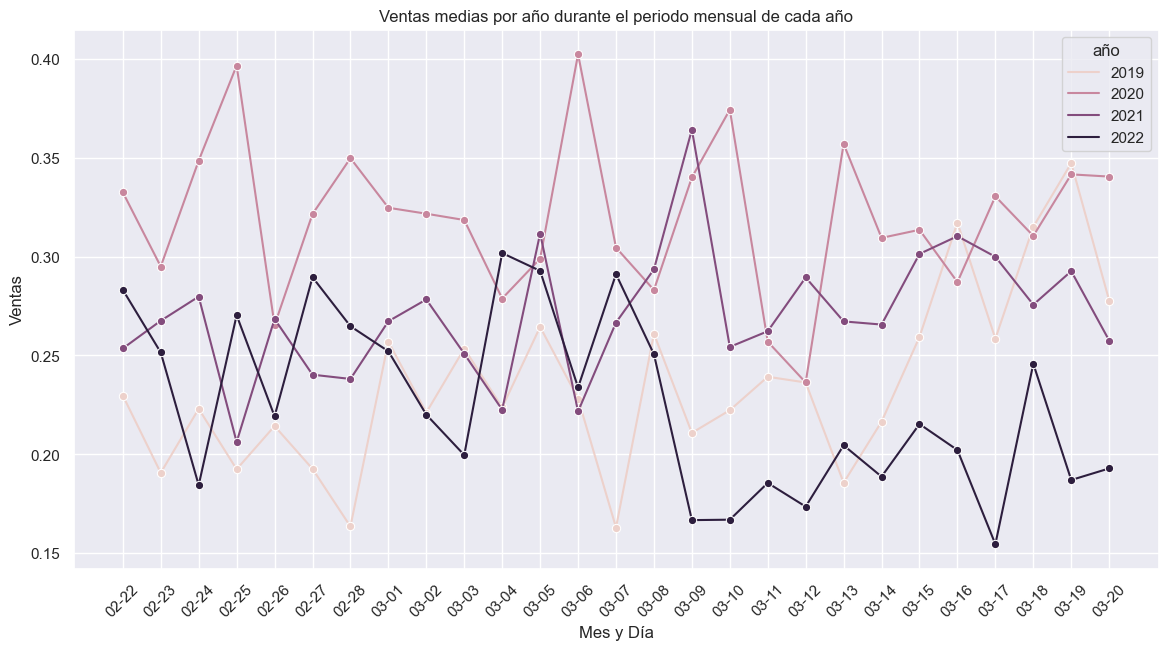

In [8]:


# Filtrar por cod_punto_ventas a cod_pv_5803
ventas_estudio_filtrado_5803 = ventas_estudio_filtrado_sin_outliers[ventas_estudio_filtrado_sin_outliers['cod_punto_venta']=='cod_pv_5803']

# Crear nuevas columnas para mes_dia y año
ventas_estudio_filtrado_5803.sort_values(by='fecha', inplace=True)
ventas_estudio_filtrado_5803['mes_dia'] = ventas_estudio_filtrado_5803['fecha'].dt.strftime('%m-%d')
ventas_estudio_filtrado_5803['año'] = ventas_estudio_filtrado_5803['fecha'].dt.year

# Configurar el estilo de los gráficos
sns.set(style="darkgrid")

# Crear el gráfico de líneas
plt.figure(figsize=(14, 7))
sns.lineplot(data=ventas_estudio_filtrado_5803, x='mes_dia', y='ventas', marker='o', hue='año')

# Configurar etiquetas y título
plt.title('Ventas medias por año durante el periodo mensual de cada año')
plt.xlabel('Mes y Día')
plt.ylabel('Ventas')
plt.xticks(rotation=45)


# Mostrar el gráfico
plt.show()

## 2.Si ha sido rentable a nivel económico sabiendo que el coste del producto es de 0.27 €/unidad vendida


Asumo que el coste del produdcto ha sido constante durante todo el tiempo. Y se asume que el coste de 0,27 esta normalizado y en las mismas unidades (€/unidad) que el resto de parámetros. 

Suponiendo que la rentabilidad se basa en si el beneficio obtenido durante ese periodo de tiempo es positivo obtenemos lo siguiente

In [9]:
# Filtrar los días de la acción, es decir del 21 de febrero al 20 de marzo
ventas_estudio_filtrado_2022 = ventas_estudio_filtrado.copy()
ventas_estudio_filtrado_2022['año'] = ventas_estudio_filtrado_2022['fecha'].dt.year.astype(str)
ventas_estudio_filtrado_2022 = ventas_estudio_filtrado_2022[ventas_estudio_filtrado_2022['año']== '2022']
ventas_estudio_filtrado_2022.drop(columns=['año'], inplace=True)
ventas_estudio_filtrado_2022.head(20)


,fecha,ventas,cod_punto_venta
21,2022-03-03,0.258954,cod_pv_2574
66,2022-02-23,0.251473,cod_pv_5803
81,2022-03-18,0.245768,cod_pv_5803
121,2022-03-07,0.291067,cod_pv_5803
160,2022-02-22,0.343485,cod_pv_2574
178,2022-03-05,0.292755,cod_pv_5803
237,2022-03-20,0.192855,cod_pv_5803
269,2022-03-12,0.211368,cod_pv_2574
283,2022-03-07,0.285835,cod_pv_2574
292,2022-02-21,0.272914,cod_pv_5803


In [10]:
# Filtrar por cod_punto_ventas
precios_estudio_filtrado = precios_estudio[precios_estudio['cod_punto_venta'].isin(['cod_pv_2574', 'cod_pv_5803'])]

# Convertir la columna de fechas a datetime
precios_estudio_filtrado['fecha'] = pd.to_datetime(precios_estudio_filtrado['fecha'])

# Convertir la columna de precio a float
precios_estudio_filtrado['precio'] = precios_estudio_filtrado['precio'].str.replace(',', '.').astype(float)

# Filtrar por el rango de fechas
precios_estudio_filtrado = precios_estudio_filtrado[(precios_estudio_filtrado['fecha'].dt.month == 2) & (precios_estudio_filtrado['fecha'].dt.day >= 21) |
                          (precios_estudio_filtrado['fecha'].dt.month == 3) & (precios_estudio_filtrado['fecha'].dt.day <= 20)]


# Eliminar columnas innecesarias
precios_estudio_filtrado = precios_estudio_filtrado.drop(columns=['cod_producto'])
# Mostrar el DataFrame filtrado
precios_estudio_filtrado.head()

C:\Users\laura\AppData\Local\Temp\ipykernel_3708\3671623934.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precios_estudio_filtrado['fecha'] = pd.to_datetime(precios_estudio_filtrado['fecha'])
C:\Users\laura\AppData\Local\Temp\ipykernel_3708\3671623934.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precios_estudio_filtrado['precio'] = precios_estudio_filtrado['precio'].str.replace(',', '.').astype(float)


,fecha,precio,cod_punto_venta
6,2022-03-03,0.690769,cod_pv_5803
11,2022-03-07,0.686221,cod_pv_5803
12,2021-03-11,0.990905,cod_pv_2574
105,2021-03-20,0.986357,cod_pv_2574
112,2020-03-05,0.581628,cod_pv_2574


In [11]:
# Filtrar los días de la acción, es decir del 21 de febrero al 20 de marzo
precios_estudio_filtrado_2022 = precios_estudio_filtrado.copy()
precios_estudio_filtrado_2022['año'] = precios_estudio_filtrado_2022['fecha'].dt.year.astype(str)
precios_estudio_filtrado_2022 = precios_estudio_filtrado_2022[precios_estudio_filtrado_2022['año']== '2022']
precios_estudio_filtrado_2022 = precios_estudio_filtrado_2022.drop(columns=['año'])


In [12]:
# Hago un Join de los dos dataframes por fecha y cod_punto_venta
precios_estudio_filtrado_2022['fecha'] == precios_estudio_filtrado_2022['fecha'].astype(str)
ventas_estudio_filtrado_2022['fecha'] == ventas_estudio_filtrado_2022['fecha'].astype(str)
ventas_precios_estudio = ventas_estudio_filtrado_2022.merge(precios_estudio_filtrado_2022, on=['fecha', 'cod_punto_venta'])

ventas_precios_estudio.head(20)




,fecha,ventas,cod_punto_venta,precio
0,2022-03-03,0.258954,cod_pv_2574,0.690769
1,2022-02-23,0.251473,cod_pv_5803,0.690769
2,2022-03-18,0.245768,cod_pv_5803,0.695316
3,2022-03-07,0.291067,cod_pv_5803,0.686221
4,2022-02-22,0.343485,cod_pv_2574,0.690769
5,2022-03-05,0.292755,cod_pv_5803,0.686221
6,2022-03-20,0.192855,cod_pv_5803,0.686221
7,2022-03-12,0.211368,cod_pv_2574,0.695316
8,2022-03-07,0.285835,cod_pv_2574,0.686221
9,2022-02-21,0.272914,cod_pv_5803,0.690769


In [13]:
# Crear nueva columna con el beneficio, donde el beneficio es: 
# beneficio = (precio_venta - precio_coste) * ventas

ventas_precios_estudio['beneficio'] = (ventas_precios_estudio['precio'] - 0.27) * ventas_precios_estudio['ventas']
ventas_precios_estudio.head(20)

,fecha,ventas,cod_punto_venta,precio,beneficio
0,2022-03-03,0.258954,cod_pv_2574,0.690769,0.108960
1,2022-02-23,0.251473,cod_pv_5803,0.690769,0.105812
2,2022-03-18,0.245768,cod_pv_5803,0.695316,0.104529
3,2022-03-07,0.291067,cod_pv_5803,0.686221,0.121148
4,2022-02-22,0.343485,cod_pv_2574,0.690769,0.144528
5,2022-03-05,0.292755,cod_pv_5803,0.686221,0.121851
6,2022-03-20,0.192855,cod_pv_5803,0.686221,0.080270
7,2022-03-12,0.211368,cod_pv_2574,0.695316,0.089898
8,2022-03-07,0.285835,cod_pv_2574,0.686221,0.118971
9,2022-02-21,0.272914,cod_pv_5803,0.690769,0.114834


In [14]:
# Calculo el beneficio total de cada punto de venta
beneficio_total = ventas_precios_estudio[['beneficio','cod_punto_venta']].groupby('cod_punto_venta').sum()
beneficio_total = beneficio_total.reset_index()
beneficio_total.head(20)

,cod_punto_venta,beneficio
0,cod_pv_2574,3.164989
1,cod_pv_5803,2.673056


Si, es rentable ya que el beneficio es positivo

## 3. Cuanto se prevé que se gane si se mantiene 2 meses más la acción.
